In [1]:
import pandas as pd
dat=pd.read_csv('book.csv')
dat

,Customer,Candies,Mangoes,Milk Packets,Payment
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [2]:
df = pd.DataFrame(dat)
selected_columns = ['Candies', 'Mangoes','Milk Packets']
selected_df = df[selected_columns]
selected_df

,Candies,Mangoes,Milk Packets
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [3]:
df = pd.DataFrame(dat)
selected_columns1 = ['Payment']
selected_df1 = df[selected_columns1]
selected_df1

,Payment
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [4]:
A = selected_df.to_numpy()
A

array([[20,  6,  2],
       [16,  3,  6],
       [27,  6,  2],
       [19,  1,  2],
       [24,  4,  2],
       [22,  1,  5],
       [15,  4,  2],
       [18,  4,  2],
       [21,  1,  4],
       [16,  2,  4]], dtype=int64)

In [5]:
C = selected_df1.to_numpy()
C

array([[386],
       [289],
       [393],
       [110],
       [280],
       [167],
       [271],
       [274],
       [148],
       [198]], dtype=int64)

In [6]:
import numpy as np
num_features = A.shape[1]
#What is the dimensionality of the vector space for this data?
print("Dimension of the vector space:", num_features)

Dimension of the vector space: 3


In [7]:

num_vectors = A.shape[0]
#How many vectors exist in this vector space?
print("Number of vectors:", num_vectors)

Number of vectors: 10


In [8]:
import numpy as np
row_echelon, _ = np.linalg.qr(A)

# Count the number of non-zero rows to find the rank
rank = np.linalg.matrix_rank(row_echelon)
#what is the rank of Matrix A?
print("Row Echelon Form:")
print(row_echelon)
print("Rank:", rank)

Row Echelon Form:
[[-0.31419211  0.49892601  0.01465039]
 [-0.25135369  0.07630841  0.77552812]
 [-0.42415935  0.29691232 -0.28313468]
 [-0.29848251 -0.36897154 -0.32288052]
 [-0.37703053  0.02478696 -0.30754116]
 [-0.34561132 -0.45554884  0.16356567]
 [-0.23564408  0.28451884  0.07532536]
 [-0.2827729   0.19794155 -0.05229682]
 [-0.32990172 -0.42668974  0.00141694]
 [-0.25135369 -0.10304292  0.29013489]]
Rank: 3


In [9]:
pseudo_inverse = np.linalg.pinv(A)
#Using Pseudo-Inverse find the cost of each product available for sale. 
print("Original Matrix:")
print(A)
print("Pseudoinverse:")
print(pseudo_inverse)

Original Matrix:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Pseudoinverse:
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


In [10]:
#Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.
X = np.dot(pseudo_inverse, C)
print("Matrix A:")
print(A)
print("Matrix C:")
print(C)
print("Model Vector X:")
print(X)

Matrix A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix C:
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Model Vector X:
[[ 1.]
 [55.]
 [18.]]


In [11]:
#Mark all customers(in “Purchase Data” table)with paymentsabove Rs. 200 as RICH and others as POOR. 
#Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior.
dat['Purchase Category'] = dat['Payment'].apply(lambda x: 'Rich' if x > 200 else 'Poor')
print(dat)

  Customer  Candies  Mangoes  Milk Packets  Payment Purchase Category
0      C_1       20        6             2      386              Rich
1      C_2       16        3             6      289              Rich
2      C_3       27        6             2      393              Rich
3      C_4       19        1             2      110              Poor
4      C_5       24        4             2      280              Rich
5      C_6       22        1             5      167              Poor
6      C_7       15        4             2      271              Rich
7      C_8       18        4             2      274              Rich
8      C_9       21        1             4      148              Poor
9     C_10       16        2             4      198              Poor


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dat['Category'] =dat['Payment'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

Y= dat.iloc[:,1:4]
Z= dat['Category']

Y_train, Y_test, Z_train, Z_test = train_test_split(Y,Z,test_size=0.25,random_state=0)
classifier = DecisionTreeClassifier()
classifier.fit(Y_train,Z_train)

print(f'Accuracy: {classifier.score(Y_test,Z_test)}')

new_customer = [[1,1,1]]
result= classifier.predict(new_customer)
print(f'New customer is: {result[0]}')

Accuracy: 1.0
New customer is: POOR


C:\Users\SNS\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
import pandas as pd
import statistics

data = pd.read_excel("data.xlsx", sheet_name="IRCTC Stock Price")

price_mean = statistics.mean(data["Price"])
price_variance = statistics.variance(data["Price"])

print("Mean Price:", price_mean)
print("Variance of Price:", price_variance)
#Calculate the mean and variance of the Price data present in column D.

Mean Price: 1560.663453815261
Variance of Price: 58732.365352539186


In [14]:
#Select the price data for all Wednesdays and calculate the sample mean. Compare the mean with the population mean and note your observations.
wednesday_data = data[data["Day"] == "Wed"]
sample_mean_wednesday = statistics.mean(wednesday_data["Price"])
print("Sample_mean_wednesday=",sample_mean_wednesday)


Sample_mean_wednesday= 1550.706


In [15]:
#Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.
april_data = data[data["Month"] == "Apr"]
sample_mean_april = statistics.mean(april_data["Price"])
print("sample_mean_april=",sample_mean_april)


sample_mean_april= 1698.9526315789474


In [16]:
#From the Chg% (available in column I) find the probability of making a loss over the stock.
loss_probability = len(data[data["Chg%"] < 0]) / len(data)
print("loss_probability=",loss_probability)

loss_probability= 0.4979919678714859


In [17]:
profit_probability_wednesday = len(wednesday_data[wednesday_data["Chg%"] > 0]) / len(wednesday_data)
print("profit_probability_wednesday=",profit_probability_wednesday)

profit_probability_wednesday= 0.42


In [18]:
conditional_prob = len(wednesday_data[(wednesday_data["Chg%"] > 0)]) / len(wednesday_data)
print("conditional_prob=",conditional_prob)

conditional_prob= 0.42


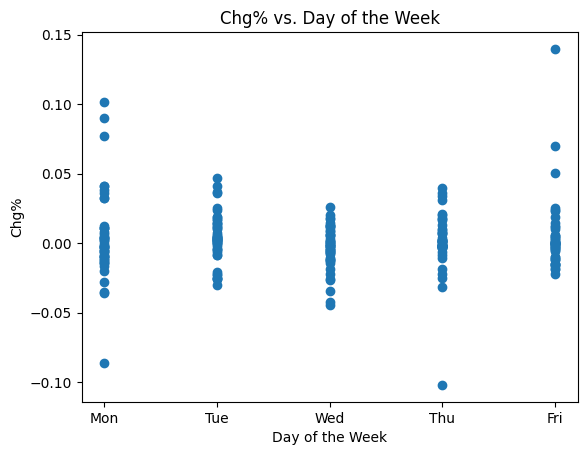

In [19]:
import matplotlib.pyplot as plt
days = ["Mon", "Tue", "Wed", "Thu", "Fri"]
data["DayNumber"] = data["Day"].apply(lambda x: days.index(x))
plt.scatter(data["DayNumber"], data["Chg%"])
plt.xticks(range(5), days)
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.title("Chg% vs. Day of the Week")
plt.show()